## 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. 선그래프

<AxesSubplot:>

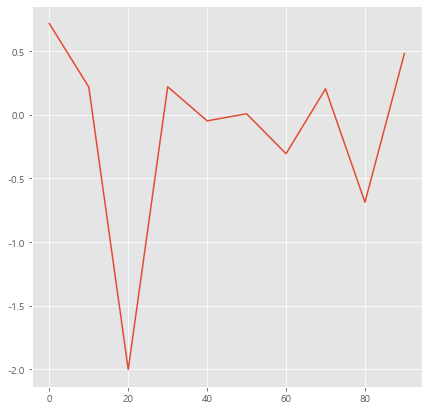

In [4]:
s = pd.Series(np.random.randn(10), index=np.arange(0,100,10))
s

s.plot()

<AxesSubplot:>

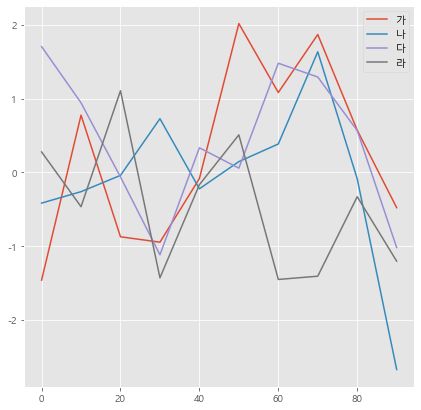

In [5]:
df1 = pd.DataFrame(np.random.randn(10,4), columns=["가","나","다","라"],index=np.arange(0,100,10))

df1

df1.plot()

# 2. 막대 그래프

<AxesSubplot:>

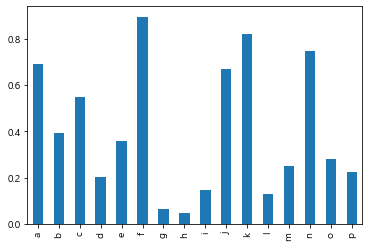

In [57]:
s2 = pd.Series (np.random.rand(16), index=list("abcdefghijklmnop"))
s2

s2.plot(kind="bar")
s2.plot.bar()

#s2.plot(kind="barh")
#s2.plot.barh()

<AxesSubplot:>

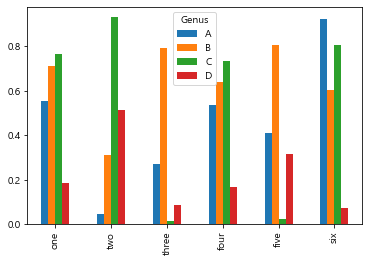

In [50]:

df2 = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df2

df2.plot(kind="bar")

# 3.histogram 1개의 변수

+ X변수가 가질 수 있는 값의 범위
+ 값만 필요하고 인덱스가 필요 없다.

<AxesSubplot:>

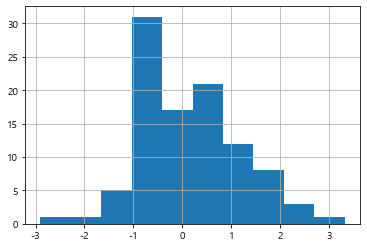

In [46]:
s = pd.Series(np.random.normal(0,1,size=100))
s

s.hist()

<AxesSubplot:>

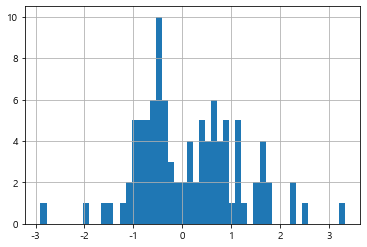

In [47]:
s.hist(bins=50)

# 4. 산포도(산점도,scatter plot) 2개의변수
+ 두변수의 관계를 확인 : 양,음,0

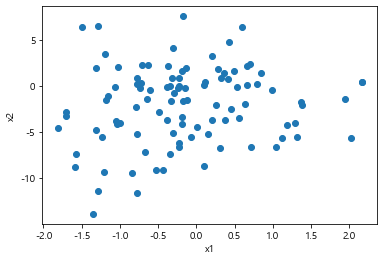

In [13]:
x1 = np.random.normal(0,1, size=(100,1))
x1

x2 = np.random.normal(-2,4, size=(100,1))
x2

x= np.concatenate((x1,x2),axis=1)
x[:5]

df =pd.DataFrame(x,columns=["x1","x2"])
df


df.plot.scatter("x1","x2")
plt.scatter(df["x1"],df["x2"])


# 5.상자 그래프(box plot)

<AxesSubplot:>

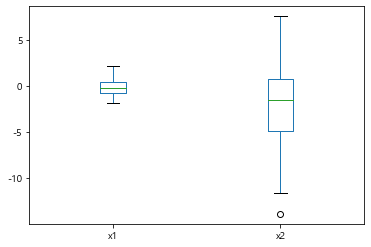

In [14]:
df.plot.box() # x1 ,x2 중에 x2가 범위가 더 넓었다 

# 6. 활용예제1

+ seaborn의 tips 샘플 예제

##### (1) 데이터준비


In [15]:
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 6-(2) total_bill 대한 금액분포 확인

Text(0, 0.5, 'Tip')

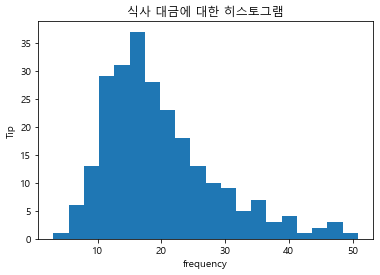

In [40]:
df=np.mean(tips)
df

#tips["total_bill"].hist()
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #2행 1열 그리고 3번째는 그래프의 위치 2행 1열의 2행을말함.

ax.hist(tips["total_bill"], bins=20) #20개의 막대
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("total_bill")


# 6- (3) total_bill과 tip의 관계를 알고싶다.

Text(0, 0.5, 'Tip')

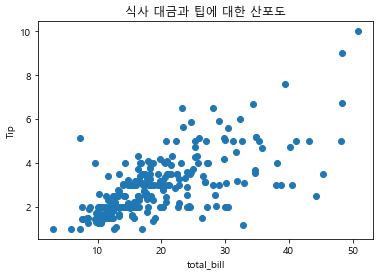

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #2행 1열 그리고 3번째는 그래프의 위치 2행 1열의 2행을말함.

ax.scatter(tips["total_bill"], tips["tip"]) #20개의 막대
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("total_bill")
ax.set_ylabel("Tip")

# 6-(3) 성별에 따른 total_bill 과 tip의 관계를 알고싶다

In [44]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'Tip')

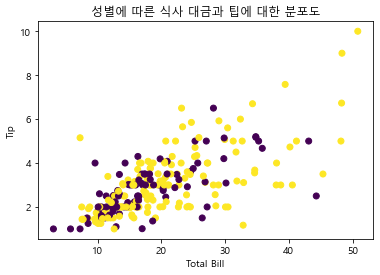

In [48]:
def record_sex(sex):
    if sex == "Female" :
        return 0
    else:
        return 1
    
    
tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"])

ax.set_title("성별에 따른 식사 대금과 팁에 대한 분포도")

ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

# (4) 성별과 인원수에 따른 total_bill과 tip의 관계를 알고싶다.

Text(0, 0.5, 'Tip')

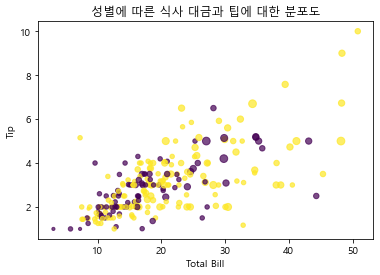

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"],alpha=0.7,
           s=tips["size"]*10)

ax.set_title("성별에 따른 식사 대금과 팁에 대한 분포도")

ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

# (5) 성별과 팁의 관계

Text(0, 0.5, 'Tip')

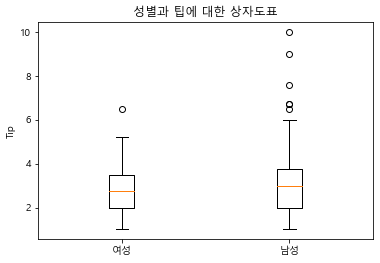

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"], tips[tips["sex"]=="Male"]["tip"]],
           labels=["여성","남성"])
           

ax.set_title("성별과 팁에 대한 상자도표")

ax.set_ylabel("Tip")

# (7) 활용예제

+ 전국 신규 민간 아파트 분양
+ https://data.go.kr/dataset/3035522/fileData.do



#### (1) 데이터 준비


In [83]:
apt = pd.read_csv("data/20200331.csv" , encoding= "euc-kr")
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [84]:
apt.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [85]:
#### column 이름을 영어로 변경하고 (city,size,year,month,price) price는 숫자로 변경

apt1 =apt

apt1.columns = ["city","size","year","month","price"]
apt1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4590 non-null   object
 1   size    4590 non-null   object
 2   year    4590 non-null   int64 
 3   month   4590 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [86]:
apt1["price"] = pd.to_numeric(apt1["price"].str.strip())

apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


In [98]:
%%time
#### 서울만 선택해서 "전체" size만 확인

apt_sa = apt1[(apt1["city"]=="서울") & (apt1["size"]=="전체")]


Wall time: 3.99 ms


In [88]:
%%time
apt1.query('(city=="서울") and (size=="전체")')

Wall time: 5.98 ms


,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0
425,서울,전체,2016,3,6173.0
510,서울,전체,2016,4,6241.0
595,서울,전체,2016,5,6264.0
680,서울,전체,2016,6,6208.0
765,서울,전체,2016,7,6254.0


In [103]:
### city,size 컬럼 삭제하고 다중 index로(year,month) 조정

apt_graph = apt_sa.drop(["city","size"], axis=1)

In [104]:
apt_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


In [105]:
apt_graph = apt_graph.set_index(["year", "month"])
apt_graph.head(10)

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0

<AxesSubplot:xlabel='year,month'>

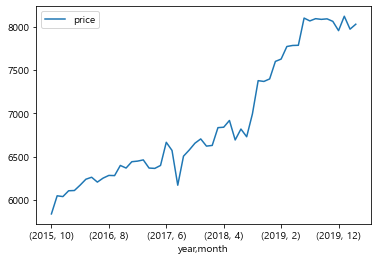

In [106]:
apt_graph.plot()

# 8. seaborn

In [107]:
tips = sns.load_dataset("tips")

Text(0, 0.5, 'total_bill')

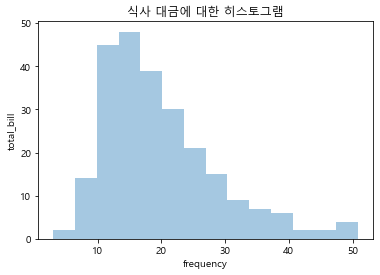

In [114]:
#### total_bill에 대한 금액 분포 확인

ax = sns.distplot(tips["total_bill"],kde=False) # 히스토그램 뺌 hist
ax.set_title("식사 대금에 대한 히스토그램")      # rug = True
ax.set_xlabel("frequency")
ax.set_ylabel("total_bill")

<AxesSubplot:xlabel='day', ylabel='count'>

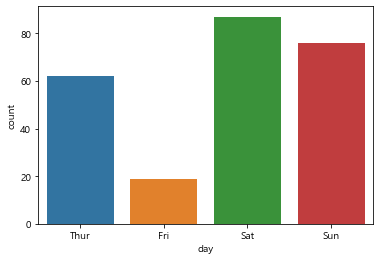

In [115]:
#### 요일별로 인원수 파악

sns.countplot("day",data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

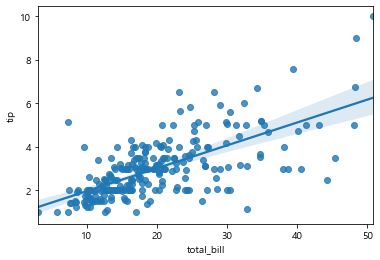

In [116]:
sns.regplot(x="total_bill",y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

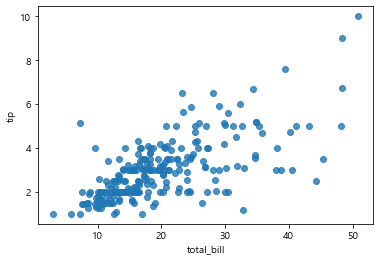

In [117]:
sns.regplot(x="total_bill",y="tip",data=tips, fit_reg=False)

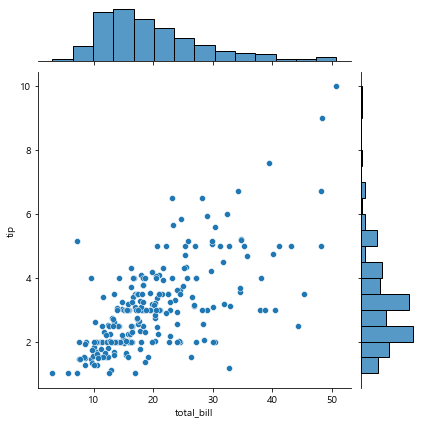

In [119]:
sns.jointplot(x="total_bill",y="tip",data=tips)

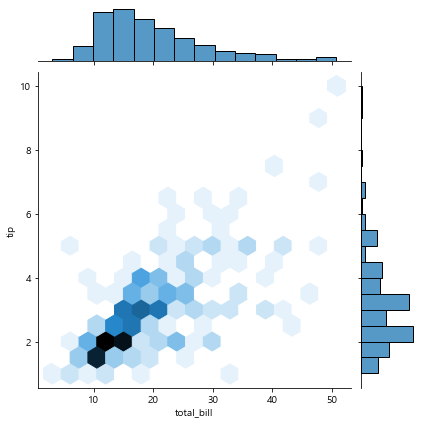

In [120]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="hex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

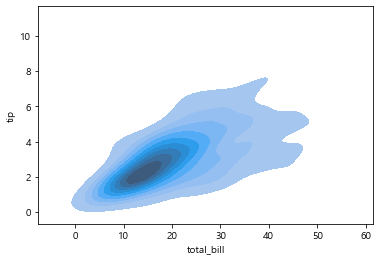

In [121]:
sns.kdeplot(x="total_bill",y="tip",data=tips, shade=True)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

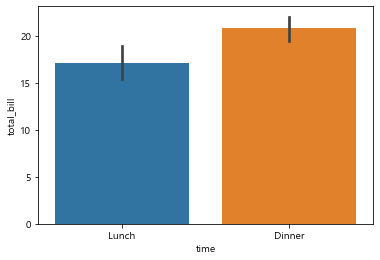

In [122]:
sns.barplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

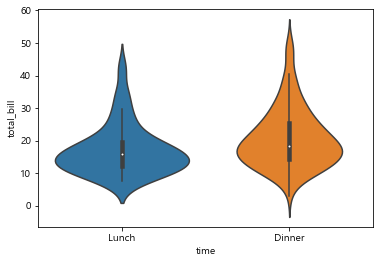

In [123]:
sns.violinplot(x="time", y="total_bill", data=tips)

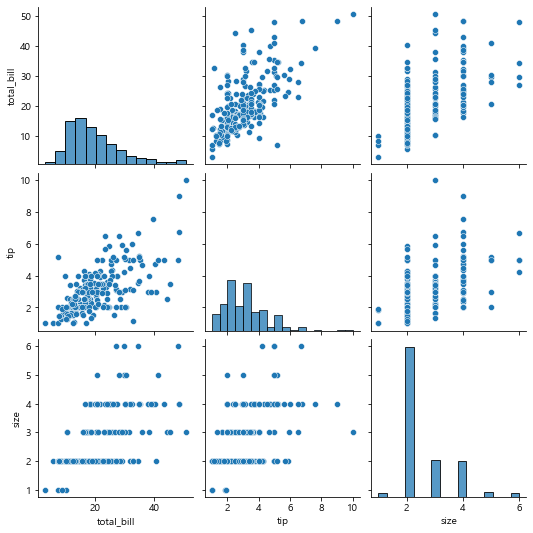

In [124]:
sns.pairplot(tips)

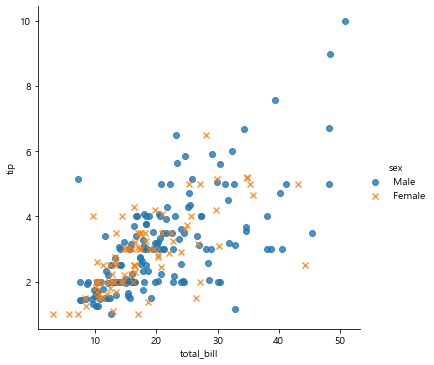

In [130]:
### 성별에 따른 total_bill 과 tip의 관계를 알고싶다.

sns.lmplot(x= "total_bill", y="tip", data=tips ,fit_reg=False,hue="sex",
          markers=["o","x"])


# 9.활용예제

+ 타이타닉 샘플 : https://www.kaggle.com/c/titanic

###### (1) 데이터 준비

In [38]:
train= pd.read_csv("data/train.csv")
train.head(20) 

#sibsp 동승자 여부 parch 부모 
#pclass 객실등급
#survived 생존여부

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
train.shape # 데이터 #891개 변수 12개

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
#### 결측치 확인

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# (2) EDA(Explorer Data Analysis)

In [41]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    
    df = pd.DataFrame([survived,dead])
    df.index =["Survived","Dead"]
    df.plot(kind="bar",stacked=True,figsize=(10,5))

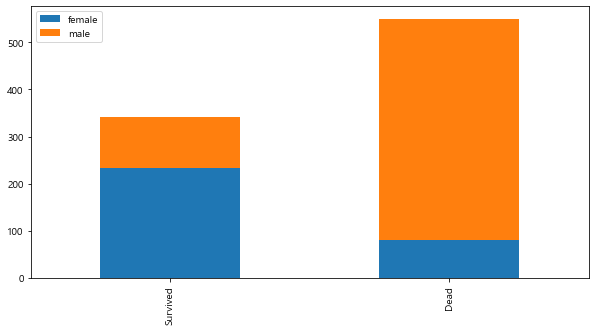

In [42]:
#### 성별에 따른 생존 여부 

bar_chart("Sex")

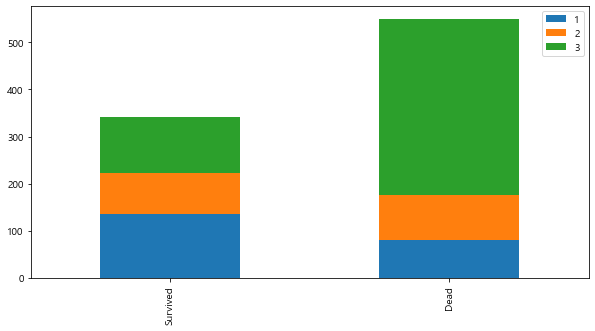

In [68]:
#### 객실등급에 따른 생존 여부

bar_chart("Pclass")

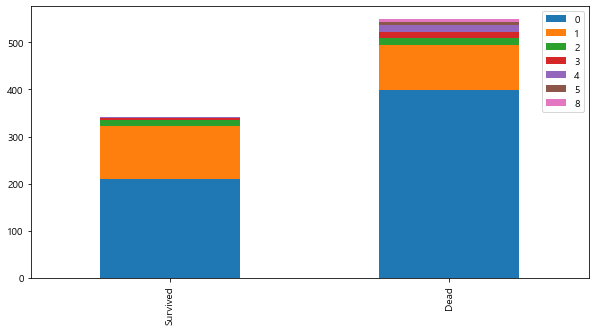

In [69]:
#### 동승(자매와 배우자) 여부에 따른 생존 여부

bar_chart("SibSp")

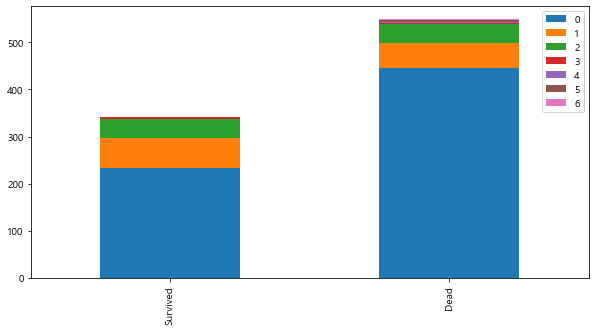

In [70]:
#### 동승(부모와 자식) 여부에 따른 생존 여부

bar_chart("Parch")


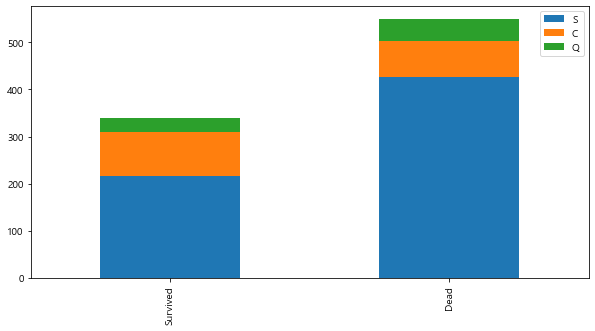

In [71]:
#### 정박지에 따른 생존 여부



bar_chart("Embarked")

## (3) Feature Engineering

##### 이름에서 호칭에 대한 부분 추출하기

"""
1. 반복
  1) * : 0번이상 반복
    ab* : a,ab,abb,abbb,abbbb..
    lo*l:ll,lol,lool,loool,looool,
    
  2) + : 1번 이상 반복
    ab+:ab,abb,abbb
    
  3) ? : 0회 또는 1회
  
    ab?: a,ab
    
  4) {m} : m회 반복 지정.
    a{3}b : aaab
    
  5) {m, n} : m회부터 n 회까지 반복
  
  a{2,3}bc : aabc aaabc
  
2. 매칭
  1) . : 줄바꿈 문자를 제외한 모든 문자와 일치
  a.b : aab,abb,acb,adb,aeb,..
  
  2) ^ : 문자열의 시작
  ^abc : abc...,adcd,asd,aqqw
  
  3) $ : 문자열의 마지막
    $a : zdba, abcda,dcda 
    
  4)  [] : 문자집합중 한 문자와 매치  
   [abc]xyz : axyz,bxyz,cxyz
   [a-z]bc :abc,bbc,cbc,dbc,ebc.... zbc
   
   단,
   a[.]b: a.b만찾음 괄호안에서서
   
   [a^bc]hello : ahello,chello

  [a-zA-Z0-9] :  문자,숫자가 올수가 있다. (특수문자제외)
  
3. 특수문자(\문자)
  1) \d : 모든 숫자와 매치
  ab\d\dc : ab00c,ab01c,ab99c,...
  ab[0-9][0-9]c
  
  2) \D : 숫자가 아닌 문자와 매치
  
  3) \s : 공백문자와 매치
  
  
  4)\S : 공백문자를 제외한 모든것과 매치
  
  5) \w : 숫자 또는 문자와 매치 
  
  6) \W : 숫자 또는 문자가 아닌 모든 문자와 매치
  
"""

#### 파이썬이 제공하는 객체 또는 메서드

+ compile() : 정규 표현식 객체 생성 
+ match() : 문자열의 처음부터 정규식과 매치되는지 조사
+ search() : 문자열 전체를 검색해서 정규식과 매치되는지 조사
+ findall() : 정규식과 매치되는 모든 문자열을 리스트로 리턴
+ finditer() : 정규식과 매치되는 모든 문자열을 반복 가능한 객체로 리턴
+ split() : 문자열 분리
+ sub() : 문자열 변경(교체)
+ .. 

In [4]:
import re



888 abc가나다ABC_888


In [11]:
# 객체를 생성해서 사용하는 방법
p = re.compile("[0-9] [a-z]+ .+")

p.match("3 yujeong jueogho") #매치가된다.
bool(p.match("3 yujeong jueogho"))

print(p.match("3 yujeong jueogho"))
print(p.match("3 yujeong, jueogho")) #단 컴마가 붙으면 0~9 랑 a-z 사이에 없기때문에 false가뜸


# 0번째부터 17번째 사이에 매칭되는게 있다 


print("----------------------------------------------")

# 바로 함수를 사용하는 방법

print(bool(re.match("[0-9]+th","35th is everything")))
print(bool(re.match("[0-9]+th","aaa 35th is everything")))# match 함수는 처음부터 맞아들어가야지 된다.
print(bool(re.search("[0-9]+th","aaa bbb 35th is everything"))) #search는 안맞아들어가도 된다.

print(re.search("[0-9]+th","aaa bbb 35th is everything"))


print("----------------------------------------------")
# 전화번호 매칭되는 패턴 작성: "010-222-2222은 내 전화 번호입니다."


#print(bool(re.match("[0-9]","010-222-2222은 내 전화번호 입니다.")))
#print(bool(re.search("[0-9]","010-222-2222은 내 전화번호 입니다.")))

re.search("[0-9]{3}-[0-9]{3,4}-[0-9]{4}", "010-222-2222은 내 전화번호 입니다.") 
re.match("\d{3}-\d+-\d{4}", "010-222-2222은 내 전화번호 입니다.") #0~12 매치


<re.Match object; span=(0, 17), match='3 yujeong jueogho'>
None
----------------------------------------------
True
False
True
<re.Match object; span=(8, 12), match='35th'>
----------------------------------------------


<re.Match object; span=(0, 12), match='010-222-2222'>

In [12]:
#### findall() 과 finditer()

data= "life 3333 is 2222 3333 444 too 10 short"
p = re.compile("[a-z]+")

p.match(data)
p.search(data)

m= p.findall(data)
print(m)

m1= p.finditer(data)
print(m1)

for i in m1 : 
    print(i)
    print(i.group()) # 그룹으로 나눠서 life is too short
    print(i.span())  #(0,4) (10,12) (27,30) (34,39)
    
    

    

['life', 'is', 'too', 'short']
<re.Match object; span=(0, 4), match='life'>
life
(0, 4)
<re.Match object; span=(10, 12), match='is'>
is
(10, 12)
<re.Match object; span=(27, 30), match='too'>
too
(27, 30)
<re.Match object; span=(34, 39), match='short'>
short
(34, 39)


In [13]:
data = "1234 abc가나다ABC_555_6"

# 숫자 1개만 일치하는 패턴

print(re.match("\d", data))

# 숫자 1개이상 일치하는 패턴

print(re.match("\d+", data))

# 숫자 2개만 일치하는 패턴

print(re.match("\d{2}", data))

# 숫자 2개만 3개까지 일치하는 패턴

print(re.match("\d{2,3}", data))

<re.Match object; span=(0, 1), match='1'>
<re.Match object; span=(0, 4), match='1234'>
<re.Match object; span=(0, 2), match='12'>
<re.Match object; span=(0, 3), match='123'>


In [14]:
data= "1234 abc가나다ABC_555_6 mbc air air"

p = re.compile("[a-z]+")

m= p.findall(data)


# bc로 끝나는 세글자(abc,mbc)
print(re.findall("\w+bc", data))

# a로 시작하는 세글자(abc,air,air)
print(re.findall("a\w{2}",  data))

# 가장 마지막에 air로 끝나는 패턴(air)

print(re.findall(".ir", data))

# 가장 처음에 1로 시작하는 숫자들 (1,1234)

print(re.findall("1[0-4]*",  data))

# 1을 뺀 모든 데이터 (234 abc가나다ABC_555_6 mbc air air)

print(re.findall("[^1].+", data))




['abc', 'mbc']
['abc', 'air', 'air']
['air', 'air']
['1234']
['234 abc가나다ABC_555_6 mbc air air']


In [15]:
#### split()

data = "mbc,kbs sbs:ytn"

print(data.split(" "))
print(data.split(","))
print("_______________________________________")
print(re.split("",data))

print(re.split("[\s,:]", data)) # 공백 
print(re.split("[,: ]", data))
print(re.split("\W", data))
print(re.split(",|:| ",data))

['mbc,kbs', 'sbs:ytn']
['mbc', 'kbs sbs:ytn']
_______________________________________
['', 'm', 'b', 'c', ',', 'k', 'b', 's', ' ', 's', 'b', 's', ':', 'y', 't', 'n', '']
['mbc', 'kbs', 'sbs', 'ytn']
['mbc', 'kbs', 'sbs', 'ytn']
['mbc', 'kbs', 'sbs', 'ytn']
['mbc', 'kbs', 'sbs', 'ytn']


In [16]:
#### sub

data = "1234 abc가나다ABC_555_6"

#m= re.sub("[0-9]+","888",data)
#m= re.sub("[0-9]","8",data)
#print(m)

print("_______________________________________")


data = "mbc,kbs sbs:ytn"
m = re.sub("\W+",",",data)
print(m)

_______________________________________
mbc,kbs,sbs,ytn


In [17]:
### 컴파일 옵션 : S(or DOTALL),I(or IGNORECASE), M(or MULTLINE)

p = re.compile("a.b",re.S) # re.S 쓰면 줄바꿈까지 해줌 # .(dot)은 모든걸 대체한다.

m1 = p.match("axb is bla bla bla~~")

print(m1)

m2 = p.match("a+b is bla bla bla~~")

print(m2)

m3 = p.match("a\nb is bla bla bla~~")

print(m3) # 줄바꿈 문자빼고 다 일치 시킨다. 

print("_______________________________________")

p= re.compile("[a-zA-Z]") # 대소문자 일치


print(p.match("python"))
print(p.match("Python"))

print("_______________________________________")

data= """python one
life is too short
python two
you need python
Python three
"""


# 첫글자 대소문자 상관없이 python으로 시작하는 문자열
p = re.compile("^[p|P]ython\s\w+",re.M) # | or 연산자 # + 한번이상 반복 ^문자열의 시작


print(p.findall(data))

<re.Match object; span=(0, 3), match='axb'>
<re.Match object; span=(0, 3), match='a+b'>
<re.Match object; span=(0, 3), match='a\nb'>
_______________________________________
<re.Match object; span=(0, 1), match='p'>
<re.Match object; span=(0, 1), match='P'>
_______________________________________
['python one', 'python two', 'Python three']


In [41]:
####### match(),search() 객체의 메서드

p= re.compile("[a-z]+")

data = "python 123 !? python"

m=p.match(data)
print(m) #매칭

print(m.group()) #찾기 
print(m.start(),m.end()) # 구간 스타트 구간 마감

<re.Match object; span=(0, 6), match='python'>
python
0 6


In [27]:
data = """
<a href="abc1.html">abc1</a>
<a href="abc2.html">abc2</a>
<a href="abc3.html">abc3</a>
<a href="xyz.html">xyz</a>
<a href="pic.jpg">pic</a>
"""
p = re.compile("\w+[.]\w+")
print(p.findall(data))

p = re.compile("[a-z0-9]+[.html|jpg]+")
print(p.findall(data))

p = re.compile("\w*\.\w+")
print(p.findall(data))

p = re.compile('\w*[.][a-z]*')
print(p.findall(data))

p = re.compile("\w{3,4}[.]\w*")
print(p.findall(data))

p=re.compile("[a-z0-9]+[.][a-z]*")
print(p.findall(data))



#[abc1.html,abc2.html,abc3.html,xyz.html,pic.jpg]

['abc1.html', 'abc2.html', 'abc3.html', 'xyz.html', 'pic.jpg']
['abc1.html', 'abc2.html', 'abc3.html', 'xyz.html', 'pic.jpg']
['abc1.html', 'abc2.html', 'abc3.html', 'xyz.html', 'pic.jpg']
['abc1.html', 'abc2.html', 'abc3.html', 'xyz.html', 'pic.jpg']
['abc1.html', 'abc2.html', 'abc3.html', 'xyz.html', 'pic.jpg']
['abc1.html', 'abc2.html', 'abc3.html', 'xyz.html', 'pic.jpg']


# (3) Feature Engineering

In [43]:
#### 이름에서 호칭에 대한 부분 추출하기

#train['Name'].str.extract(", ([a-zA-Z]+).")

#train["Name"].str.extract("(Mr[.]|Mrs[.]|Miss[.])")

# *0번이상 반복 , + 1번이상 반복 , . 전체 받아주기 \d 숫자 


train["title"]=train['Name'].str.extract("([A-Za-z]+)\.")

train["title"].value_counts()

title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Major":3, "Mlle":3,
                "Col":3, "Sir":3, "Don":3, "Mme":3, "Lady":3, "Jonkheer":3, "Countess":3,
                "Capt":3, "Ms":3}



train["title"] = train["title"].map(title_mapping)
train["title"].value_counts()

0    517
1    182
2    125
3     67
Name: title, dtype: int64

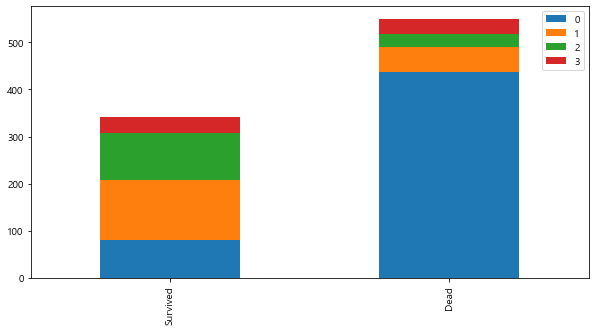

In [44]:
bar_chart("title")

In [45]:
#### age

train.info()

print(train.groupby("title")["Age"].mean())
print(train.groupby("title")["Age"].median())

#train["Age"].fillna(train.groupby("title")["Age"].median())

train["Age"].fillna(train.groupby("title")["Age"].transform("median"),inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
title
0    32.368090
1    21.773973
2    35.898148
3    20.430161
Name: Age, dtype: float64
title
0    30.0
1    21.0
2    35.0
3     9.0
Name: Age, dtype: float64
<class 'pandas.core.frame.DataFrame'>


(20.0, 30.0)

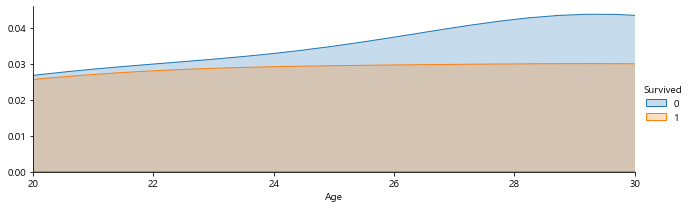

In [47]:
facet= sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend()
facet.set(xlim=(0, train["Age"].max()))
plt.xlim(20,30)



---
# 10.지도 시각화

+ pip install folium

In [48]:
import folium

In [49]:
folium.Map(location=[37.49817906622366, 127.02760946772257],zoom_start=20,tiles="Stamen Toner") # 확대 zoom

# (1) 미국 50개주의 실업율 표시

In [50]:
state_unemp = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")

state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [54]:
map =folium.Map(location=[40,-98], zoom_start=4)
state_geo = "data/map/folium_us-states.json"

map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id",
               columns=["State","Unemployment"],fill_color="YlGn") # 연결시켜주는 함수 choropleth
                                                 # key_on 일치하는것.
map


# (2)Marking

In [56]:

map=folium.Map(location=[37.49817906622366, 127.02760946772257],zoom_start=20)
map

marker= folium.Marker(location=[37.49817906622366, 127.02760946772257],icon=folium.lcon(color="red",icon="star"))
marker.add_to(map) # 마킹이 되어짐 별표시로

marker= folium.Marker(location=[37.49817906622366, 127.02760946772257],icon=folium.lcon(color="red",icon="star"),
                     popup="강남역 근처").add_to(map)

map
#### 범위지정

folium.CircleMarker(location=[37.49817906622366, 127.02760946772257], popup="강남역 근처",
                   radius=50, color="#ffffgg",fill_color="#ffffggg").add_to(map)

map

AttributeError: module 'folium' has no attribute 'lcon'

# 11.wordcloud

+ pip install wordcloud

In [63]:
from wordcloud import WordCloud,STOPWORDS

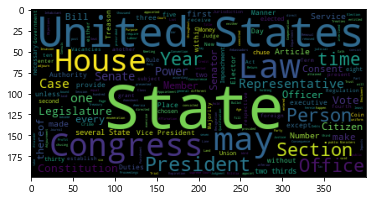

In [64]:
text = open("data/wordcloud/constitution.txt")
text
text = text.read()
text

wc= WordCloud().generate(text)
wc
dir(wc)

wc.words_ # 비율값 어떤 단어가 빈번하게 등장했는지 확률로 알려주는 기능

plt.imshow(wc)



(-0.5, 399.5, 199.5, -0.5)

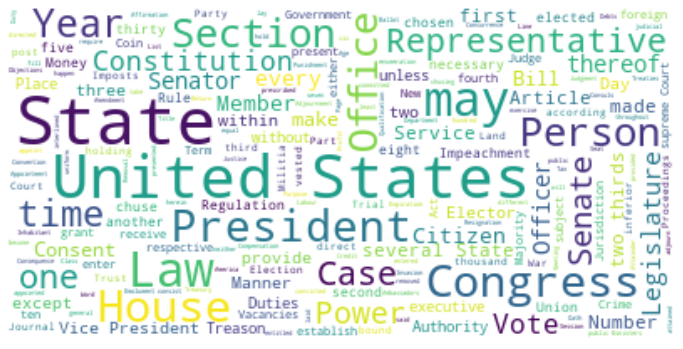

In [65]:
wc= WordCloud(max_font_size=40,background_color="white").generate(text) # 글자크키 배경
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation="bilinear") # 선명하게해줌 

plt.axis("off")

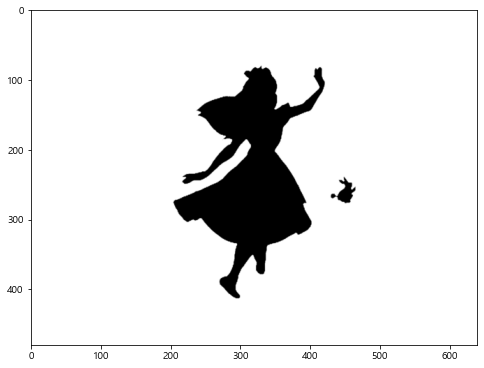

In [66]:
from PIL import Image


alice_mask =np.array(Image.open("data/wordcloud/alice_mask.png"))

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

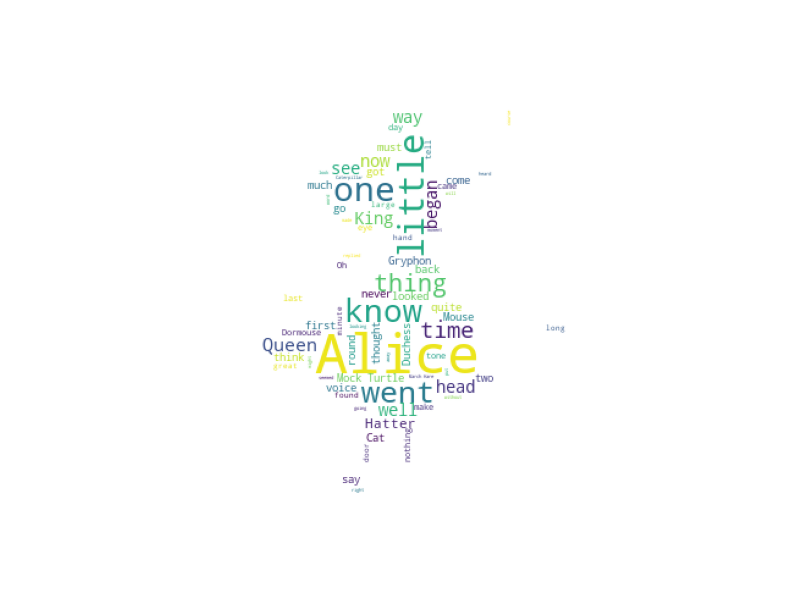

In [73]:
#wc= WordCloud(max_font_size=40,background_color="white",mask=alice_mask).generate(text)

text = open("data/wordcloud/alice.txt").read()
text

stopwords =set(STOPWORDS)
stopwords.add("said") # said 빼기


wc= WordCloud(max_font_size=50,background_color="white",mask=alice_mask,stopwords=stopwords, max_words=100).generate(text)

plt.figure(figsize=(14,14))
plt.imshow(wc)

plt.axis("off")

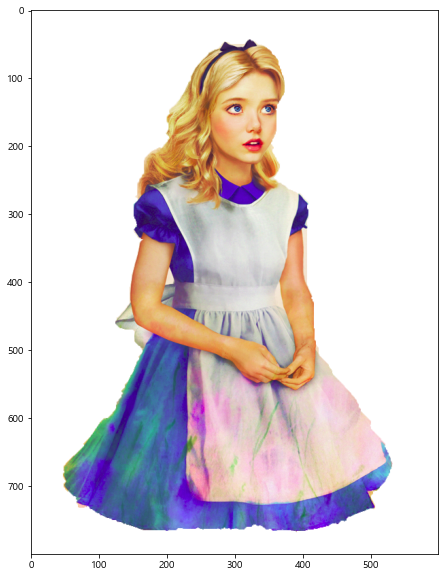

In [74]:
alice_color =np.array(Image.open("data/wordcloud/alice.png"))

plt.figure(figsize=(10,10))
plt.imshow(alice_color)


(-0.5, 599.5, 799.5, -0.5)

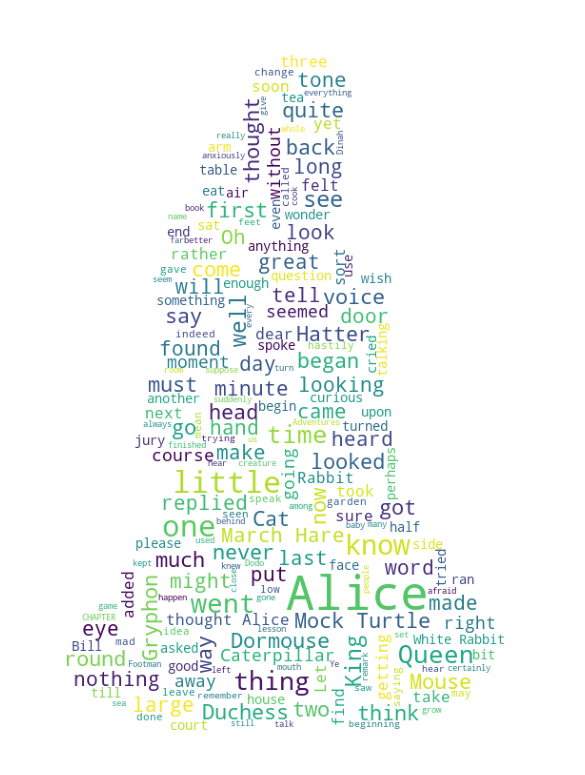

In [76]:


wc= WordCloud(max_font_size=50,background_color="white",mask=alice_color,stopwords=stopwords, max_words=200).generate(text)

plt.figure(figsize=(14,14))
plt.imshow(wc)

plt.axis("off")


(-0.5, 599.5, 799.5, -0.5)

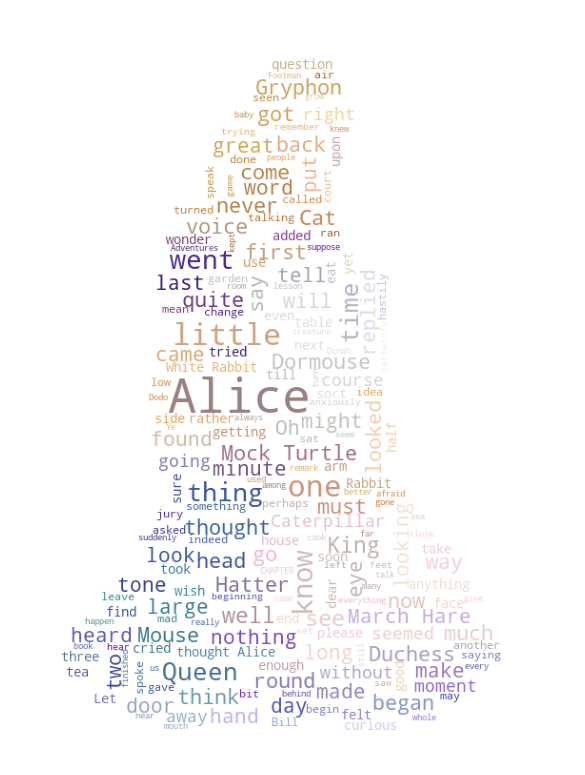

In [77]:
import wordcloud

wc= WordCloud(max_font_size=50,background_color="white",mask=alice_color,    
              stopwords=stopwords, max_words=200).generate(text)  #배경은 화이트에 폰트사이즈는 50 또한 최대 200글자까지 산출. 
# stopword 기능은 글자 빼기 기능

image_colors = wordcloud.ImageColorGenerator(alice_color) ### 색깔 최대한 비슷하게 맞춰주는 기능

plt.figure(figsize=(14,14))
plt.imshow(wc.recolor(color_func=image_colors)) ### 색깔 최대한 비슷하게 맞춰주는 기능

plt.axis("off")


# http://konlpy.org

# Pip install konlpy

pip uninstall konlpy -> yes

pip unistall JPye1

C:\Users\김정호>cd C:\Users\김정호\Desktop\netsong\pythonwork

C:\Users\김정호\Desktop\netsong\pythonwork>dir JPype1-1.1.2-cp38-cp38-win_amd64.whl

In [7]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import wordcloud

In [7]:
import tweepy
tweepy.__version__

'3.10.0'

In [3]:
okt = Okt()
okt.nouns("아버지가방에들어가신다")

['아버지', '가방']

In [36]:
ko_text = kolaw.open("constitution.txt").read()
ko_text


# 형태소 분석
okt =Okt()
token_ko = okt.nouns(ko_text)
token_ko
print(len(token_ko)) #단어 수

# 불용어 처리 
stop_words= ["제","월","일","조","때","그","이","바","및","안","정","위","관"]
token_ko = [word for word in token_ko if word not in stop_words]
print(len(token_ko))

# 워드 카운팅

ko=nltk.Text(token_ko, name= "대한민국 헌법")
dir(ko)
data = ko.vocab().most_common(50)

wc = WordCloud(max_font_size=40, background_color= "white",
               font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))


plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation="bilnear")
plt.axis("off")

3882
3299


NameError: name 'WordCloud' is not defined

In [17]:
for data in token_ko:
    if data in stop_words:
        token_ko.remove(data)
        
print(len(token_ko))

3378
